In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
path = 'C:/Users/parth/Desktop/Git/Projects/IBM/'
data = pd.read_csv(path+'IBM.csv')

Let's check the data frame details.

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
﻿Age                        1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

We can see that there are no null values. So we do not need to impute any missing values.

In [46]:
data.head()

,﻿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


The Attrition column is the label. We need to predict this column.

Before running our model, let's analyse the data fully. That will give us a better overview of how attrition is done at several levels.

Let's first check the distribution of Attrition.

No     1233
Yes     237
Name: Attrition, dtype: int64


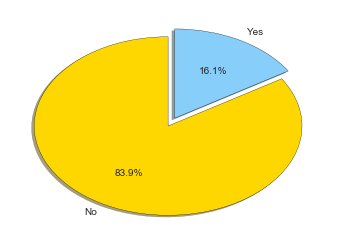

In [72]:
attritionCount = data['Attrition'].value_counts()
print(attritionCount)
labels = ['No','Yes']
colors = ['gold', 'lightskyblue']
explode = (0.1,0)

plt.pie(attritionCount,explode = explode, labels = labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
       
plt.show()

Most of the cases have Attrition values as No (Almost 84%)

Age

Let's first see the Age distribution.

C:\Users\parth\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


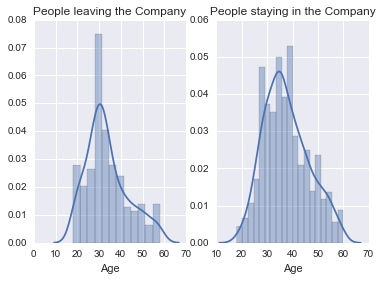

In [68]:
age_yes = data['\ufeffAge'].ix[data['Attrition']=='Yes'].values
age_no = data['\ufeffAge'].ix[data['Attrition']=='No'].values

plt.subplot(1,2,1)
sns.distplot(age_yes)
plt.xlabel('Age')
plt.title('People leaving the Company')

plt.subplot(1,2,2)
sns.distplot(age_no)
plt.xlabel('Age')
plt.title('People staying in the Company')
plt.show()

While employees are joining company at different age group, attrition is mostly at middle-age that is 25-35. And a very big spike at age 30.

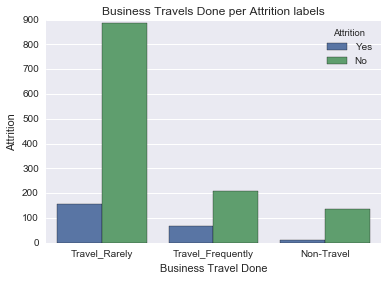

In [70]:
sns.countplot(x= 'BusinessTravel',hue= 'Attrition', data= data)
plt.ylabel('Attrition')
plt.xlabel('Business Travel Done')
plt.title('Business Travels Done per Attrition labels')
plt.show()

People who do not travel at all, tend to stay. People who travel rarely- even though people leaving numbers are high, but the ratio is very small. Most people who travel frequently tend to leave.

DailyRate

C:\Users\parth\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


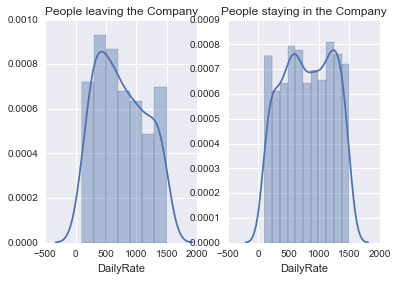

In [87]:
plt.subplot(1,2,1)
sns.distplot(data.ix[data['Attrition']=='Yes']['DailyRate'].values)
plt.xlabel('DailyRate')
plt.title('People leaving the Company')
plt.subplot(1,2,2)
sns.distplot(data.ix[data['Attrition']=='No']['DailyRate'].values)
plt.xlabel('DailyRate')
plt.title('People staying in the Company')
plt.show()

Employees getting less salary tend to leave. People getting high salary prefer to stay in company for long.

Department: In which departments people stay most and at which departments people mostly leave?

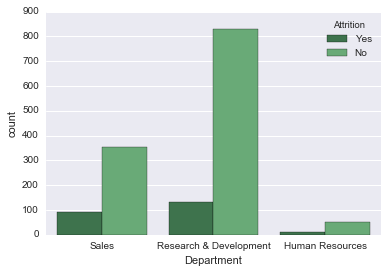

In [88]:
sns.countplot(x= 'Department',hue= "Attrition", data= data, palette= 'Greens_d')
plt.show()

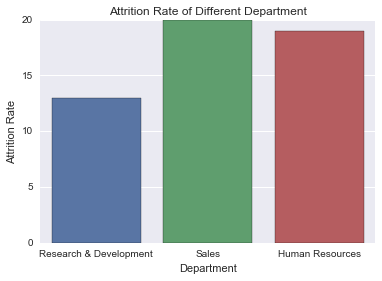

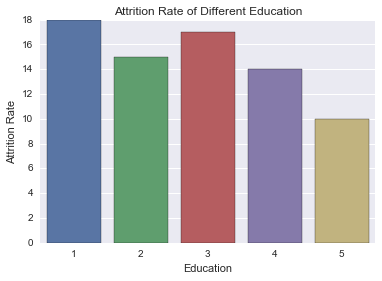

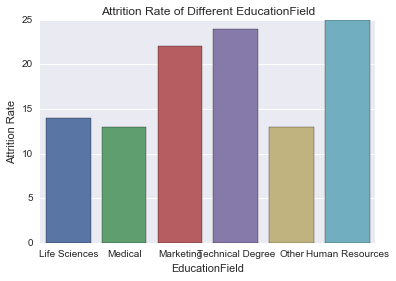

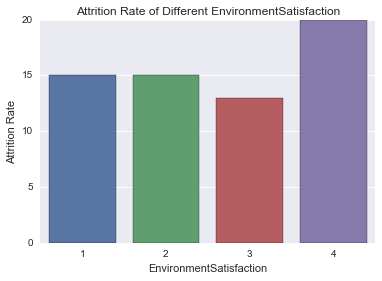

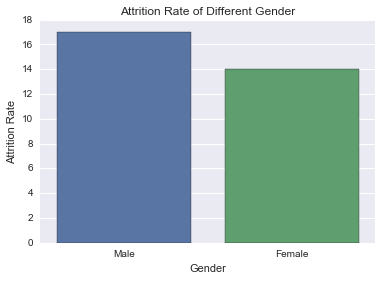

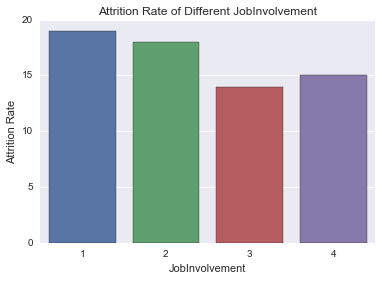

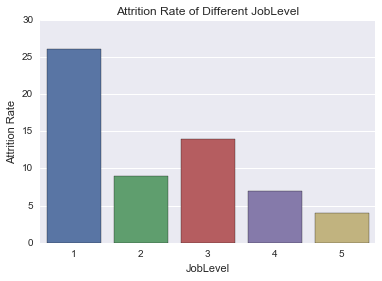

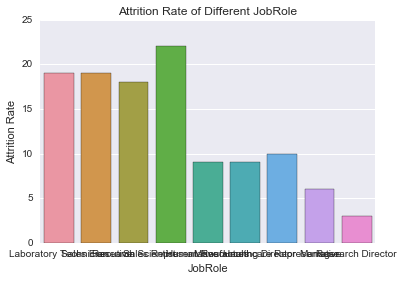

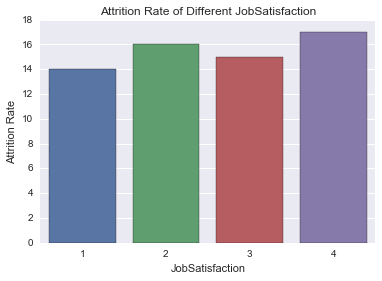

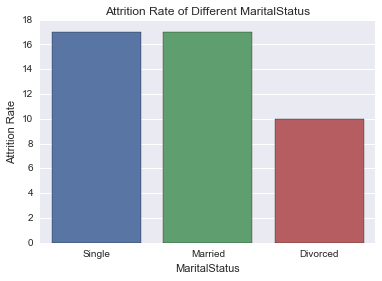

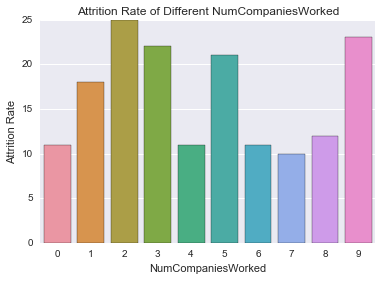

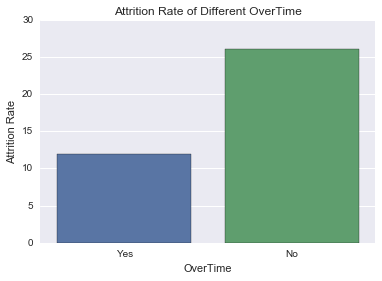

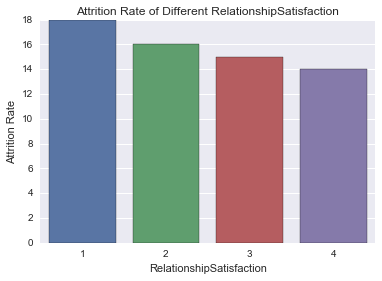

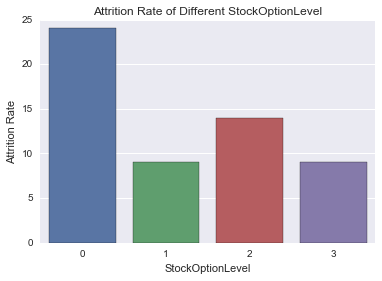

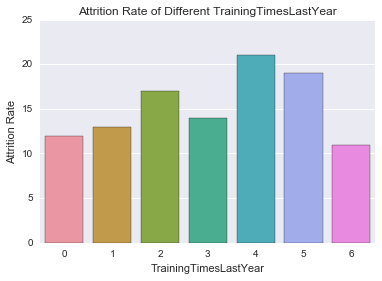

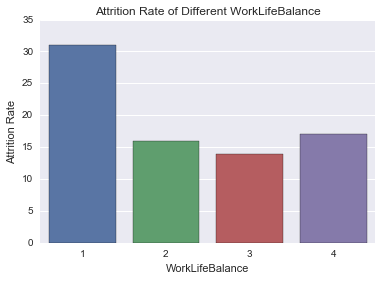

In [129]:
colIndex = [4,6,7,10,11,13,14,15,16,17,20,22,25,27,29,30]
for j in range(16):
    col = data.columns.values[colIndex[j]]
    #col = 'Department'
    Count_yes = (data.ix[data['Attrition']=='Yes'][col]).value_counts()
    Count = data[col].value_counts()
    for i in range(len(Count_yes)):
        Count_yes.values[i] = Count_yes.values[i] * 100/ Count.values[i]
    #plt.subplot(4,4,j+1)
    sns.barplot(x=Count_yes.index,y=Count_yes.values)
    plt.xlabel(col)
    plt.ylabel('Attrition Rate')
    plt.title('Attrition Rate of Different ' + col)
    plt.show()

Few of the above graphs are not comprehensible because they are given values like 1, 2, 3 without any meaning.
But, below things can be comprehended:
1. The R&D Department has the lowest attrition rate. HR and Sales have almost equal Attrition rate.
2. Technical,Marketing, and HR which are normally in high demand, people tend to switch more.
3. Environment Satisfaction with level - 4 may be the worst- as people tend to leave more there.
4. Female employee tend to be more loyal than male.
5. I think Job Involvement - 1 is lowest job involvement. As they tend to leave more.
6. People at lower job levels leave more.
7. People at top hiererchy leave less.
8. The lower the job satisfaction, the more people leave.
9. Attrition rate for single and married people are same, whereas Divorced people have a lower attrition rate.
10. Employees who have switched 1-3 companies tend to leave more.
11. Employees getting overtime are staying with the company.
12. Personal life and Professional life do go together. Employees with higher relationship satisfaction tend to stay with the Company.
13. Employees do value stock option. Employees who are not getting stock option have very high attrition rate.
14. Employees do not appreciate too much training. Also, employees who are getting a lot of training may not be doing well inn the job. So, they have a higher attrition rate.
15. And finally, employees with low Work-Life-Balance tend to leave the company more.


Let's create a heat map to see how different columns are correlated with each other.
For a better model prediction, we prefer to have features which are poorly correlated with each other.

In [138]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [162]:
# creating a list of only numerical values
colIndex = [0,3,5,6,10,12,13,14,16,18,19,20,23,24,25,27,28,29,30,31,32,33,34]
data2 = [
    go.Heatmap(
        z= data[colIndex].astype(float).corr().values, # Generating the Pearson correlation
        x=data[colIndex].columns.values,
        y=data[colIndex].columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data2, layout=layout)
py.offline.iplot(fig, filename='labelled-heatmap')

As we can see there is very less correlation among the features.

# Encoding Categorical Variables

In [199]:
# Let's first separate the features and label
y= data.iloc[:,1].values
data = data.drop('Attrition',axis=1)
data.head()

,﻿Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [200]:
catCols = []

for col, value in data.iteritems():
    if value.dtype == 'object':
        catCols.append(col)


In [201]:
data_cat = data[catCols]
data_num = data.drop(catCols,axis=1)
data_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [202]:
data_cat = pd.get_dummies(data_cat)
data_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [204]:
data_labels = pd.concat([data_cat,data_num],axis=1)

In [205]:
'''
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelEnc=LabelEncoder()
#data_cat[:] = labelEnc.fit_transform(data_cat.values)
for col in catCols:
    data[col]=labelEnc.fit_transform(data[col])
    
data.head()
'''

'\nfrom sklearn.preprocessing import LabelEncoder,OneHotEncoder\nlabelEnc=LabelEncoder()\n#data_cat[:] = labelEnc.fit_transform(data_cat.values)\nfor col in catCols:\n    data[col]=labelEnc.fit_transform(data[col])\n    \ndata.head()\n'

In [206]:
data_labels.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1,80,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,80,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,80,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,80,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,4,80,1,6,3,3,2,2,2,2


In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_labels,y,test_size = 0.25, random_state = 25)

In [212]:
import xgboost
from sklearn.ensemble import GradientBoostingClassifier

In [210]:
# Gradient Boosting Parameters
seed = 0
gb_params ={
    'n_estimators': 500,
    'max_features': 0.9,
    'learning_rate' : 0.2,
    'max_depth': 11,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [213]:
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(X_train, y_train)
# Get our predictions
gb_predictions = gb.predict(X_test)
print("Predictions have finished")
gb_predictions

Predictions have finished


array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', '

In [214]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, gb_predictions)

array([[305,   7],
       [ 48,   8]])

In [215]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gb_predictions)

0.85054347826086951